In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
con = sqlite3.connect('database.sqlite')
loan = pd.read_csv('loan.csv')

/home/amirwuzhere/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [34]:
loan_rate_related = pd.read_sql_query( """
SELECT loan_amnt, term, int_rate, grade, emp_title, emp_length, home_ownership, loan_status, annual_inc,issue_d,
purpose, title, addr_state,application_type,
CASE WHEN loan_amnt < 8000 THEN 'low' 
     WHEN loan_amnt >= 8000 AND loan_amnt < 13000 THEN 'medium-low'
     WHEN loan_amnt >= 13000 AND loan_amnt < 20000 THEN 'medium-high'
     WHEN loan_amnt >= 20000 THEN 'high' END as loan_amnt_level,
CASE WHEN annual_inc < 45000 THEN 'low'
     WHEN annual_inc >= 45000 AND annual_inc <65000 THEN 'medium-low'
     WHEN annual_inc >= 65000 AND annual_inc < 90000 THEN 'medium-high'
     WHEN annual_inc >= 90000 THEN 'high' END as annual_inc_level
FROM loan
""",con)

In [35]:
loan_rate_related.head()

loan_amnt        term int_rate grade                 emp_title emp_length  \
0     5000.0   36 months   10.65%     B                      None  10+ years   
1     2500.0   60 months   15.27%     C                     Ryder   < 1 year   
2     2400.0   36 months   15.96%     C                      None  10+ years   
3    10000.0   36 months   13.49%     C       AIR RESOURCES BOARD  10+ years   
4     3000.0   60 months   12.69%     B  University Medical Group     1 year   

  home_ownership  loan_status  annual_inc   issue_d         purpose  \
0           RENT   Fully Paid     24000.0  Dec-2011     credit_card   
1           RENT  Charged Off     30000.0  Dec-2011             car   
2           RENT   Fully Paid     12252.0  Dec-2011  small_business   
3           RENT   Fully Paid     49200.0  Dec-2011           other   
4           RENT      Current     80000.0  Dec-2011           other   

                  title addr_state application_type loan_amnt_level  \
0              Computer         AZ       INDIVIDUAL             low   
1                  bike         GA       INDIVIDUAL             low   
2  real estate business         IL       INDIVIDUAL             low   
3              personel         CA       INDIVIDUAL      medium-low   
4              Personal         OR       INDIVIDUAL             low   

  annual_inc_level  
0              low  
1              low  
2              low  
3       medium-low  
4      medium-high

In [36]:
loan_rate_related.shape

(887383, 16)

In [37]:
loan_rate_related.isnull().sum()

loan_amnt               1
term                    1
int_rate                1
grade                   1
emp_title           51458
emp_length              1
home_ownership          1
loan_status             1
annual_inc              5
issue_d                 1
purpose                 1
title                 152
addr_state              1
application_type        1
loan_amnt_level         1
annual_inc_level        5
dtype: int64

In [38]:
loan_rate_related = loan_rate_related.dropna(subset=["loan_amnt","term","int_rate","grade","emp_length","home_ownership","annual_inc",
                                              "issue_d","purpose","addr_state","application_type"])

In [39]:
loan_rate_related["int_rate"]=loan_rate_related["int_rate"].apply(lambda x: float(x.rstrip("%")))

Text(0.5,1,"how 'loan amount' affects 'interest rate' ")

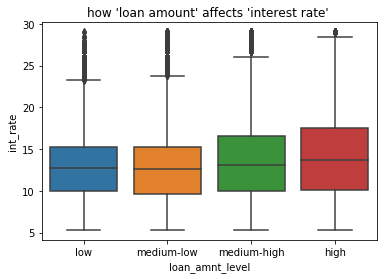

In [40]:
order = ["low", "medium-low","medium-high","high"]
sns.boxplot(x='loan_amnt_level',y="int_rate",data = loan_rate_related,order=order)
plt.title("how 'loan amount' affects 'interest rate' ")

Text(0.5,1,"how 'term' affects 'interest rate'")

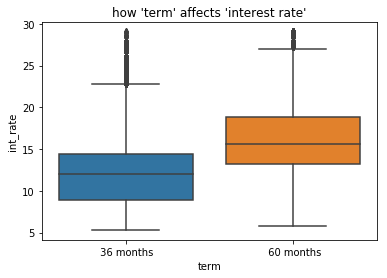

In [41]:


plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='term',y="int_rate",data = loan_rate_related)
plt.title("how 'term' affects 'interest rate'")



Text(0.5,1,"how 'grade' affects 'interest rate'")

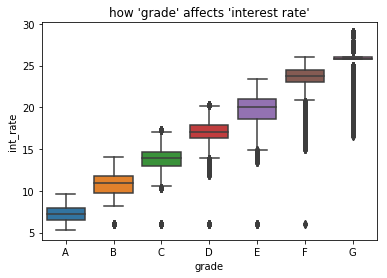

In [42]:



plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='grade',y="int_rate",data = loan_rate_related,order=["A","B","C","D","E","F","G"])
plt.title("how 'grade' affects 'interest rate'")




In [43]:
loan["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

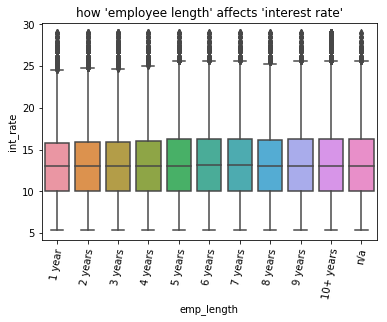

In [44]:


order = ['1 year', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'n/a']
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='emp_length',y="int_rate",data = loan_rate_related,order=order)
plt.title("how 'employee length' affects 'interest rate'")
plt.xticks(size = 10,rotation = 80)



Text(0.5,1,"how 'purpose' affects 'interest rate'")

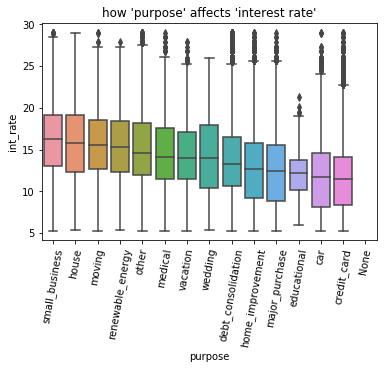

In [45]:
order = rate_by_purpose["purpose"].tolist()
sns.boxplot(x='purpose',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'purpose' affects 'interest rate'")

In [46]:
rate_by_purpose = pd.read_sql_query( """
SELECT purpose, avg(int_rate) AS avg_rate
FROM loan
GROUP BY purpose
ORDER BY avg_rate desc
""",con)
rate_by_purpose

purpose   avg_rate
0       small_business  16.233037
1                house  16.008460
2               moving  15.729104
3     renewable_energy  15.392365
4                other  15.021655
5              medical  14.562644
6             vacation  14.340332
7              wedding  14.151657
8   debt_consolidation  13.601386
9     home_improvement  13.026919
10      major_purchase  12.673565
11         educational  12.120142
12                 car  12.005558
13         credit_card  11.773749
14                None        NaN

Text(0.5,1,"how 'purpose' affects 'interest rate'")

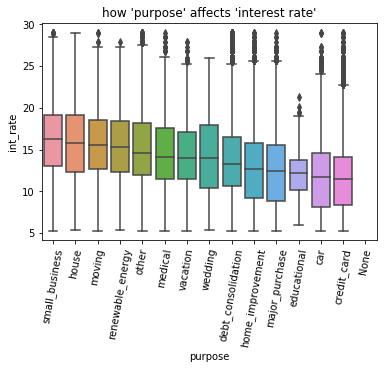

In [47]:
order = rate_by_purpose["purpose"].tolist()
sns.boxplot(x='purpose',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'purpose' affects 'interest rate'")

In [48]:
rate_by_loan_status = pd.read_sql_query( """
SELECT loan_status, avg(int_rate) AS avg_rate
FROM loan
GROUP BY loan_status
ORDER BY avg_rate desc
""",con)
rate_by_loan_status




loan_status   avg_rate
0                                             Default  16.139459
1                                         Charged Off  16.015850
2                                  Late (31-120 days)  16.003794
3                                   Late (16-30 days)  15.703920
4                                     In Grace Period  15.353318
5   Does not meet the credit policy. Status:Charge...  14.597148
6   Does not meet the credit policy. Status:Fully ...  13.978642
7                                          Fully Paid  13.274262
8                                             Current  12.945774
9                                              Issued  12.440378
10                                               None        NaN

In [49]:
loan["loan_status
     "].unique()

SyntaxError: EOL while scanning string literal (<ipython-input-49-ec577a00ea44>, line 1)

In [ ]:
order = rate_by_loan_status["loan_status"].tolist()
sns.boxplot(x='purpose',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'loan_status' affects 'interest rate'")

Text(0.5,1,"how 'home_ownership' affects 'int_rate'")

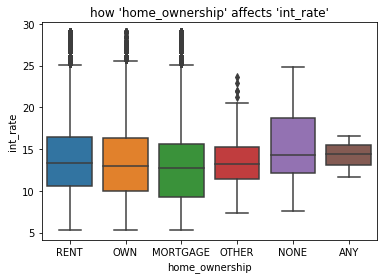

In [50]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='home_ownership',y="int_rate",data = loan_rate_related)
plt.title("how 'home_ownership' affects 'int_rate'")

In [30]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='loan_status',y="int_rate",data = loan_rate_related)
plt.title("how 'home_ownership' affects 'int_rate'")

ValueError: Could not interpret input 'loan_status'

In [33]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='loan_status',y="int_rate",data = loan_rate_related)
plt.title("how 'loan_status' affects 'int_rate'")

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [52]:
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

Text(0.5,1,"how 'loan_status' affects 'interest rate'")

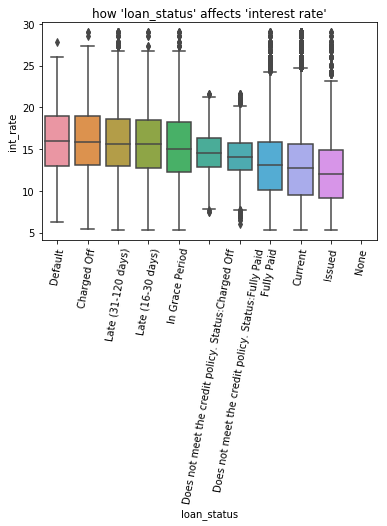

In [55]:
order = rate_by_loan_status["loan_status"].tolist()
sns.boxplot(x='loan_status',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'loan_status' affects 'interest rate'")

In [56]:
rate_by_state = pd.read_sql_query( """
SELECT addr_state, avg(int_rate) AS avg_rate
FROM loan
GROUP BY addr_state
ORDER BY avg_rate desc
""",con)
rate_by_state

addr_state   avg_rate
0          HI  13.922619
1          AL  13.757150
2          AK  13.639791
3          TN  13.575913
4          OK  13.477952
5          MS  13.476719
6          SC  13.475563
7          NV  13.470705
8          IN  13.463229
9          AR  13.458215
10         DE  13.453246
11         SD  13.426259
12         NC  13.422175
13         WA  13.402623
14         MD  13.380040
15         WY  13.366775
16         WV  13.354781
17         LA  13.348598
18         UT  13.346312
19         KY  13.340130
20         PA  13.332582
21         OH  13.332359
22         NM  13.327109
23         NY  13.326871
24         MI  13.296108
25         VA  13.288569
26         KS  13.280913
27         FL  13.272852
28         GA  13.272731
29         MO  13.246034
30         CA  13.161799
31         TX  13.160487
32         MN  13.150752
33         NJ  13.150185
34         OR  13.140087
35         AZ  13.131357
36         IL  13.096091
37         RI  13.087657
38         CO  13.074323
39         MT  13.068851
40         CT  13.068787
41         WI  12.983013
42         VT  12.962315
43         NE  12.960323
44         ND  12.900522
45         NH  12.852306
46         DC  12.756838
47         MA  12.661871
48         IA  12.631429
49         ME  12.464610
50         ID  11.345833
51       None        NaN

Text(0.5,1,"how 'state' affects 'interest rate'")

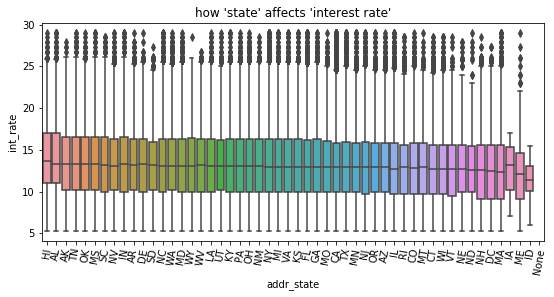

In [57]:


plt.rc("figure", figsize=(9, 4))
order = rate_by_state["addr_state"].tolist()
sns.boxplot(x='addr_state',y="int_rate",data = loan_rate_related, order = order)
plt.xticks(size = 10,rotation = 80)
plt.title("how 'state' affects 'interest rate'")



Text(0.5,1,"how 'annual income level' affects 'interest rate' ")

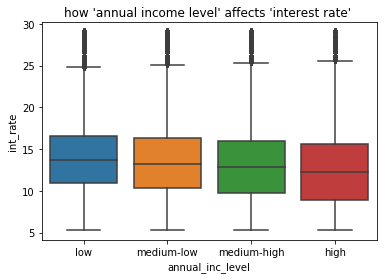

In [16]:
order = ["low", "medium-low","medium-high","high"]
sns.boxplot(x='annual_inc_level',y="int_rate",data = loan_rate_related,order=order)
plt.title("how 'annual income level' affects 'interest rate' ")